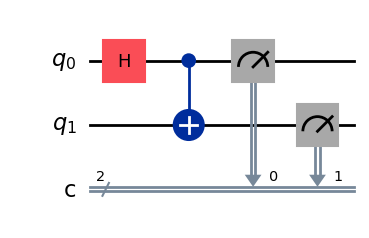

In [3]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
%matplotlib inline

# Com o qc, se define um circuito quântico, neste caso, com 2 qubits e 2 bits clássicos:
qc = QuantumCircuit(2, 2)

# Porta Hadamard
qc.h(0)
qc.cx(0, 1)  # Porta CNOT

# Medir os qubits para os bits clássicos
qc.measure([0,1],[0,1])

# Print do circuito
qc.draw()

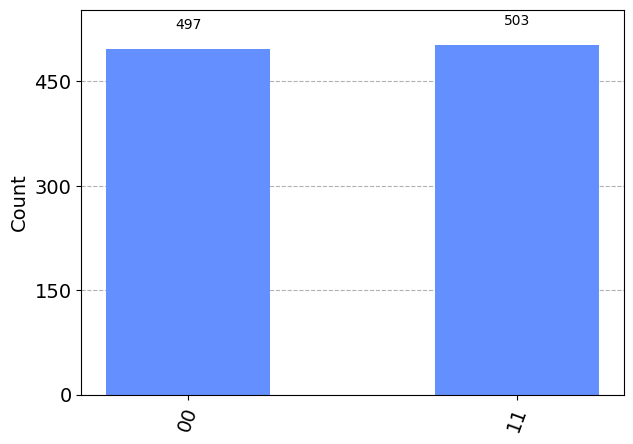

In [4]:
from qiskit_ibm_provider import IBMProvider
from qiskit import transpile, QuantumCircuit
from qiskit.visualization import plot_histogram

provider = IBMProvider()  
backend = provider.get_backend('ibmq_qasm_simulator')

qc = QuantumCircuit(2, 2)
qc.h(0)  
qc.cx(0, 1) 
qc.measure([0, 1], [0, 1])

transpiled_circuit = transpile(qc, backend)

job = backend.run(transpiled_circuit, shots=1000)

result = job.result()

counts = result.get_counts(transpiled_circuit)

plot_histogram(counts)
